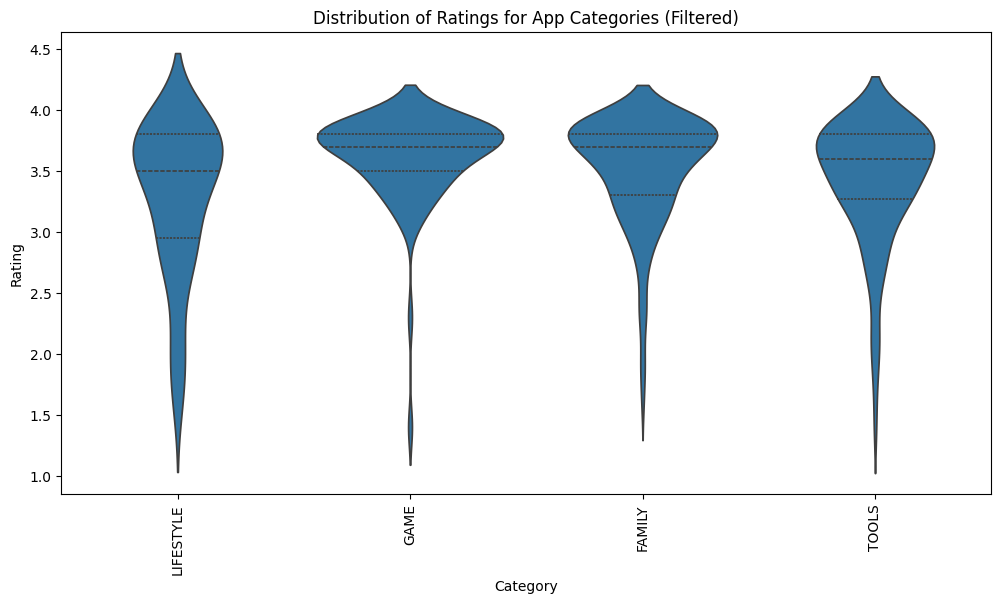

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz


file_path = 'Play Store Data.csv'
df = pd.read_csv(file_path)


df.columns = df.columns.str.strip().str.lower()


df = df.dropna(subset=['rating', 'reviews', 'app', 'category'])


df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


df = df.dropna(subset=['reviews', 'rating'])


filtered_df = df[(df['rating'] < 4.0) &
                 (df['reviews'] >= 10) &
                 (df['app'].astype(str).str.contains('C', case=False, na=False))]


category_counts = filtered_df['category'].value_counts()
valid_categories = category_counts[category_counts > 50].index
filtered_df = filtered_df[filtered_df['category'].isin(valid_categories)]


ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
start_time = datetime.strptime("16:00", "%H:%M").time()
end_time = datetime.strptime("18:00", "%H:%M").time()


if start_time <= current_time <= end_time and not filtered_df.empty:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='category', y='rating', data=filtered_df, inner='quartile')
    plt.xticks(rotation=90)
    plt.title('Distribution of Ratings for App Categories (Filtered)')
    plt.xlabel('Category')
    plt.ylabel('Rating')
    plt.show()
else:
    print("Graph can only be displayed between 4 PM IST to 6 PM IST or no valid data available.")